<h3>Building a CNN based 10 class classifier
training and testing the classifier by using MNIST dataset</h3>


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

2025-09-15 10:22:36.410381: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-15 10:22:36.424410: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-15 10:22:36.537591: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-15 10:22:36.662976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757910156.739360    9647 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757910156.77

In [6]:
#load dataset
(x, y), (x_test, y_test) = mnist.load_data()
print("x shape: " + str(x.shape))
print("y shape: " + str(y.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

x_train = x[:60000]
y_train = y[:60000]

x_val = x[60000:]
y_val = y[60000:]

print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_val shape: " + str(x_val.shape))
print("y_val shape: " + str(y_val.shape))

x shape: (60000, 28, 28)
y shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_val shape: (0, 28, 28)
y_val shape: (0,)


In [9]:
#build cnn model 
img_size=(28,28,1)
num_classes=10
inputs = Input(shape=img_size)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(x1)
x3=Conv2D(256, kernel_size=(3, 3), activation='relu')(x2)
x = Flatten()(x3)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

E0000 00:00:1757910347.524187    9647 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1757910347.525688    9647 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 102400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,107,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,496,458 (51.48 MB)

 Trainable params: 13,496,458 (51.48 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [25]:
# model training
batch_size = 64
epochs = 5

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)

# Train the model and store the training history
history = model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val_cat))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 448s 477ms/step - accuracy: 0.9910 - loss: 0.0307
Epoch 2/5


2025-09-15 11:04:30.103246: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/mylove/4.1/AI lab /venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


938/938 ━━━━━━━━━━━━━━━━━━━━ 405s 432ms/step - accuracy: 0.9930 - loss: 0.0226
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 389s 415ms/step - accuracy: 0.9934 - loss: 0.0210
Epoch 4/5


2025-09-15 11:17:44.310860: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


938/938 ━━━━━━━━━━━━━━━━━━━━ 396s 422ms/step - accuracy: 0.9949 - loss: 0.0165
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 375s 400ms/step - accuracy: 0.9958 - loss: 0.0140


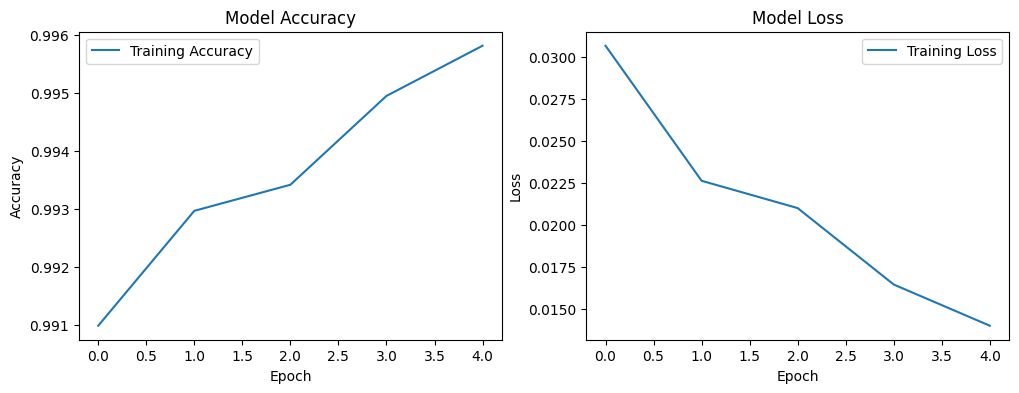

In [27]:
#accuracy and loss plots
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
	plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
	plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



--- Visualizing Predictions vs. Real Images ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


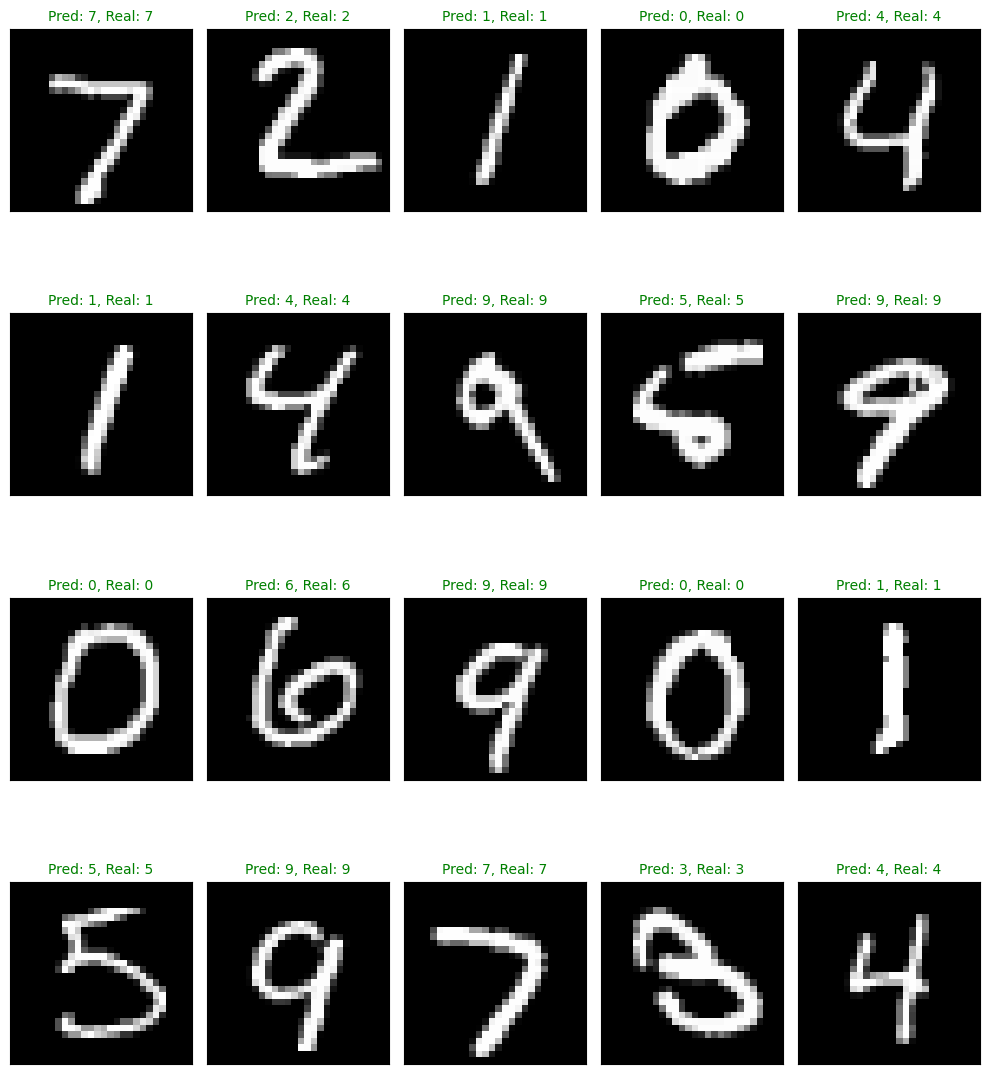

In [29]:
print("\n--- Visualizing Predictions vs. Real Images ---")

# Predict on first 20 test samples
y_pred_probs = model.predict(x_test[:20])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test[:20]

plt.figure(figsize=(10, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")

    # Title with color coding
    color = "green" if y_pred[i] == y_true[i] else "red"
    plt.title(f"Pred: {y_pred[i]}, Real: {y_true[i]}", fontsize=10, color=color)

    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

